# Projeto 1 - Ciência dos Dados
### Gustavo Berger 2 Eng A



A revolução informacional do início do século XXI democratizou o uso das tecnologias de informação?

### Introdução - O motivo da escolha do tema

Após a revolução técno-científica-informacional do início do século XXI , foi muito disseminada a ideia de que a tecnologia se democratizou ao redor do mundo, garantindo a maioria dos países o acesso à informação e aos novos instrumentos de comunicação. Com esse projeto tenho a intenção de verificar se isso realmente ocorreu. 

### Primeiros Passos do código

Para o início do código foi necessário baixar os dados do site gapminder.org como uma planilha excel e importa-los para o jupyter, assim como a biblioteca pandas.

Nessas primeiras células também ocorreu a manipulação das tabelas para que só fosse disposto o ano de 2015, com os títulos das colunas desejadas e a junção dos dados em uma mesma tabela.

In [16]:
#=================== Imports e mudança de índice ===================
import pandas as pd
import seaborn as sns

internet = pd.read_excel('internet_users.xlsx')
i= internet.set_index('geo')
hdi= pd.read_excel('hdi_human_development_index.xlsx')
h= hdi.set_index('geo')
celular= pd.read_excel('cell_phones_per_100_people.xlsx')
c= celular.set_index('geo')


#=================== Seleção do ano desejado ===================
internet_final = i.iloc[:,55:56]
hdi_final= h.iloc[:,25:26]
celular_final= c.iloc[:,55:56]

#=================== Join da primeira parte da tabela e Mudança de nome das colunas ===================
hdi_internet = hdi_final.join(internet_final, how='inner', rsuffix='_internet', lsuffix='_hdi')
hdi_internet["% que usa internet"]= hdi_internet.pop("2015_internet")
hdi_internet["IDH"]= hdi_internet.pop("2015_hdi")


#=================== Seleção do ano desejado ===================
Dados= hdi_internet.join(celular_final, how='inner')
Dados["Celulares para cada 100 pessoas"]= Dados.pop(2015)
Dados= Dados.dropna(axis= "index")

# Gráfico 1: Porcentagem de pessoas que utilizam a internet pelo IDH

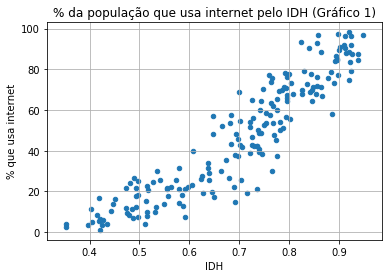

In [17]:
Dados.plot.scatter(x="IDH", y="% que usa internet", grid= True, title= "% da população que usa internet pelo IDH (Gráfico 1)");

### Conclusões sobre gráfico 1

O gráfico demonstra que mesmo com a revolução técno-informacional, o uso que a população de um país faz da internet continua sendo extremamente dependente do IDH deste país o que comprova que a distribuição de informação ainda é muito pouco democratizada ao redor do mundo.

Esse fenômeno ocorre com a internet por conta do alto custo dos aparelhos necessários para seu acesso. Isso faz com que os países com GDP baixo (e portanto com IDH reduzido) tenham uma menor quantidade de aparelhos que podem acessar a internet (como smartphones, computadores, tablets e televisões). 

# Gráfico 2: Número de celulares para cada 100 pessoas pelo IDH

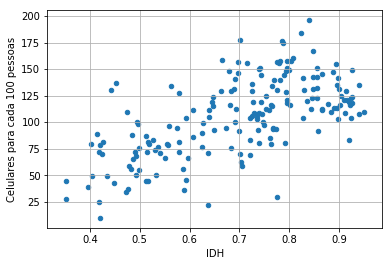

In [18]:
Dados.plot.scatter(x="IDH", y="Celulares para cada 100 pessoas", grid= True);

### Conclusões sobre o gráfico 2

Esse gráfico, mesmo que ainda tenha uma certa tendência, corrobora mais com a hipótese de que a tecnologia vem se democratizando. Isto porque demonstra-se mais heterogêneo, mostrando alguns países com IDHs baixos e que apresentam elevados números de telefones celulares em sua população. 

Isso pode ser explicado pelo baixo preço de venda de celulares simples e o amplo acesso à redes telefônicas ao redor do mundo. 

# Gráfico do número de celulares para cada 100 pessoas pela porcentagem de usuários da internet por país

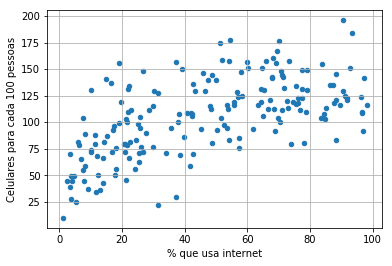

In [19]:
Dados.plot.scatter(x="% que usa internet", y="Celulares para cada 100 pessoas", grid= True);

Esse gráfico mostra que se número de telefones celulares é baixo, o uso da internet também é. Isso se dá por conta da maior acessibilidade aos telefones celulares, isto é, um país com pouco uso de uma tecnologia de fácil acesso, também usará pouco uma de alcance mais difícil. Porém, quando o uso da internet é alto, há um certo limite de aproximadamente 1,25 celulares por pessoa. Esse comportamento faz total sentido, já que para maior parte da população mundial, 1 celular por pessoa é suficiente.

# Comparação com outros anos (2015 - ano base- com 2008 e 2010)

Nesta parte foi realizado o mesmo procedimento feito para o ano de 2015 nos primeiros passos do código, porém para os anos de 2008 e 2010

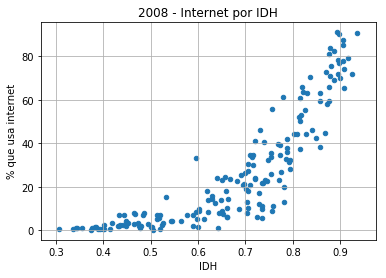

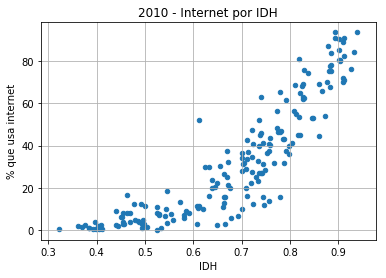

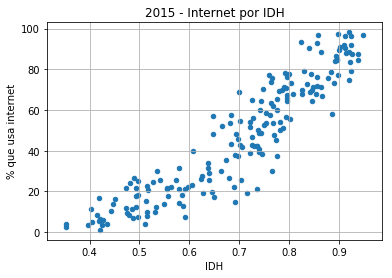

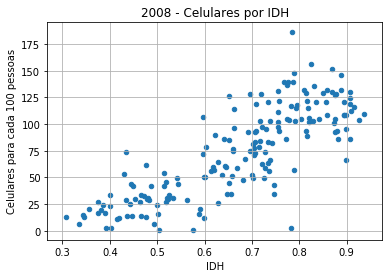

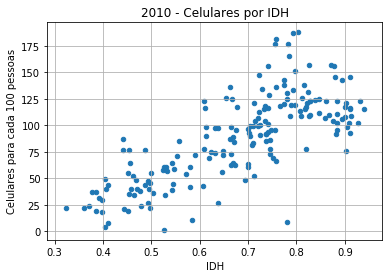

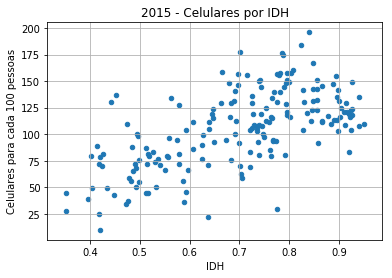

In [29]:
#=================================== 2010 ===================================
internet_2010= i.iloc[:,50:51]
celular_2010= c.iloc[:,50:51]
idh_2010= h.iloc[:,20:21]


hdi_internet = idh_2010.join(internet_2010, how='inner', rsuffix='_internet', lsuffix='_hdi')
hdi_internet["% que usa internet"]= hdi_internet.pop("2010_internet")
hdi_internet["IDH"]= hdi_internet.pop("2010_hdi")


Dados_2010= hdi_internet.join(celular_2010, how='inner')
Dados_2010["Celulares para cada 100 pessoas"]= Dados_2010.pop(2010)
Dados_2010= Dados_2010.dropna(axis= "index")



#=================================== 2008 ===================================
internet_2008= i.iloc[:,48:49]
celular_2008= c.iloc[:,48:49]
idh_2008= h.iloc[:,18:19]


hdi_internet = idh_2008.join(internet_2008, how='inner', rsuffix='_internet', lsuffix='_hdi')
hdi_internet["% que usa internet"]= hdi_internet.pop("2008_internet")
hdi_internet["IDH"]= hdi_internet.pop("2008_hdi")


Dados_2008= hdi_internet.join(celular_2008, how='inner')
Dados_2008["Celulares para cada 100 pessoas"]= Dados_2008.pop(2008)
Dados_2008= Dados_2008.dropna(axis= "index")


#=================================== Plotagem dos gráficos (Internet por IDH) ===================================
Dados_2008.plot.scatter(x="IDH", y="% que usa internet", grid= True, title= "2008 - Internet por IDH");
Dados_2010.plot.scatter(x="IDH", y="% que usa internet", grid= True, title= "2010 - Internet por IDH");
Dados.plot.scatter(x="IDH", y="% que usa internet", grid= True, title= "2015 - Internet por IDH");


#=================================== Plotagem dos gráficos (Celulares por IDH) ===================================
Dados_2008.plot.scatter(x="IDH", y="Celulares para cada 100 pessoas", grid= True, title= "2008 - Celulares por IDH");
Dados_2010.plot.scatter(x="IDH", y="Celulares para cada 100 pessoas", grid= True, title= "2010 - Celulares por IDH");
Dados.plot.scatter(x="IDH", y="Celulares para cada 100 pessoas", grid= True, title= "2015 - Celulares por IDH");

Análisando os dados no ano de 2005 é possível ver uma fortíssima relação de dependência entre IDH e os fatores escolhidos (% da população que utiliza internet e celulares a cada 100 pessoas), em que países com maiores índices de desenvolvimento o uso da tecnologia também é maior. Porém, no ano de 2010 essa dependência começa a ser dispersar (principalmente no que se trata dos celulares), tendência essa que se mantém para o ano de 2015.

#### Correlação 2008

In [21]:
Dados_2008.corr() 

,% que usa internet,IDH,Celulares para cada 100 pessoas
% que usa internet,1.000000,0.847046,0.713416
IDH,0.847046,1.000000,0.810795
Celulares para cada 100 pessoas,0.713416,0.810795,1.000000


#### Correlação 2010

In [22]:
Dados_2010.corr()

,% que usa internet,IDH,Celulares para cada 100 pessoas
% que usa internet,1.000000,0.878508,0.651123
IDH,0.878508,1.000000,0.754279
Celulares para cada 100 pessoas,0.651123,0.754279,1.000000


#### Correlação 2015

In [23]:
Dados.corr()

,% que usa internet,IDH,Celulares para cada 100 pessoas
% que usa internet,1.000000,0.921838,0.609088
IDH,0.921838,1.000000,0.632959
Celulares para cada 100 pessoas,0.609088,0.632959,1.000000


#### Matriz de gráficos de 2015 (mais fácil a visualização dos gráficos)

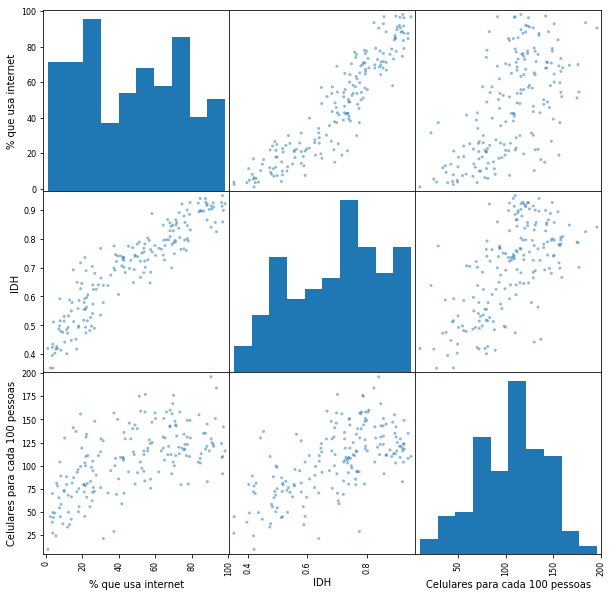

In [24]:
pd.plotting.scatter_matrix(Dados, figsize=(10,10));

# Conclusões Finais

A partir da análise dos dados conclui que para a resposta da pergunta proposta, seria neceesário Responder 3 outros pontos sobre a relação da tecnologia com o nível social de um país nos dias atuais. São eles:


#### 1) A população mundial tem mais acesso à telefones celulares do que à internet?
Sim, como comentado anteriormente, isso se da principalmente por conta do preço baixo dos celulares com relação ao preço do acesso à internet. Além disso, também é um fator muito relevante a área de cobertura do celular, que é maior que a coberta da internet


#### 2) Democratização da Internet?
A tecnologia está ficando cada vez mais acessível, o que é possível observar pelos gráfico de 2008, 2010 e 2015. Enquanto no gráfico de 2005 a internet era extremamente restrita para países com baixo IDH, nos gráficos de 2010 e 2015 é possível observar que esse recurso se tornou mais acessível a todos os países (mesmo havendo ainda uma forte tendência para o maior uso da internet a países com maiores IDHs). Os gráficos mostram também uma linearização do uso da internet com relação ao IDH, já que em 2008, 2010 e 2015 uma tendência exponencial se transforma em linear, ou seja, o uso da internet está aumentando mesmo nos países com baixos IDHs. Isso explica também o motivo da tendência ser a diminuição de dependências entre IDH e uso de internet em um país mesmo com o aumento do índice de correlação ao longo do tempo.


#### 3) Democratização dos Celulares?
Quanto aos telefones celulares, seu acesso em países com IDHs mais baixos é surpreendentemente alto em 2015. Esse uso em países subdesenvolvidos aumentou consideravelmente nos últimos anos, dado que o preço desses dispositivos decresceu muito. Estatisticamente, ao longo do tempo, foi observado uma diminuição nos índices de correlação entre o IDH e o uso de celulares, comprovando, juntamente com a maior dispersão dos pontos nos gráficos, que o celular vem sim se democratizando, mesmo que lentamente.


## Pergunta principal:
### A revolução informacional do início do século XXI democratizou o uso das tecnologias de informação?
Ainda há um longo caminho pela frente para podermos afirmar com convicção que todos os países tem acesso igual e pleno das tecnologias de informação, porém, análisando um período de 8 anos, é possível observar mudanças significativas no uso destes recursos ao redor do mundo. Assim, é possível confirmar que existe uma propensão ao uso igualitário dos recursos tecnologicos, mesmo que para atingir esse objetivo seja necessário um longo e demorado processo.
